# Churn Prediction

## 1. Creation of a model that predicts which businesses are likely to churn at the start of 2015 based on the vertical and incorporation_date.

Importing the necessery libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
Importing data into a pandas dataframe and looking for 
information

In [2]:
df = pd.read_csv('churn_data.csv', parse_dates=True, index_col='Unnamed: 0') 
df.head()

,jan_payments,feb_payments,mar_payments,apr_payments,may_payments,jun_payments,jul_payments,aug_payments,sep_payments,oct_payments,...,apr_mandates,may_mandates,jun_mandates,jul_mandates,aug_mandates,sep_mandates,oct_mandates,nov_mandates,dec_mandates,company
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,art/cinema
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,art/cinema
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,contractor
3,3.0,1.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,art/cinema
4,0.0,0.0,18.0,0.0,24.0,0.0,0.0,10.0,0.0,0.0,...,8.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,accountancy


In [3]:
df.columns

Index(['jan_payments', 'feb_payments', 'mar_payments', 'apr_payments',
       'may_payments', 'jun_payments', 'jul_payments', 'aug_payments',
       'sep_payments', 'oct_payments', 'nov_payments', 'dec_payments',
       'jan_mandates', 'feb_mandates', 'mar_mandates', 'apr_mandates',
       'may_mandates', 'jun_mandates', 'jul_mandates', 'aug_mandates',
       'sep_mandates', 'oct_mandates', 'nov_mandates', 'dec_mandates',
       'company'],
      dtype='object')

In [4]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[0:-1]

In [5]:
df = df.reindex_axis(cols, axis = 1)

In [6]:
df.dtypes

company          object
jan_payments    float64
feb_payments    float64
mar_payments    float64
apr_payments    float64
may_payments    float64
jun_payments    float64
jul_payments    float64
aug_payments    float64
sep_payments    float64
oct_payments    float64
nov_payments    float64
dec_payments    float64
jan_mandates    float64
feb_mandates    float64
mar_mandates    float64
apr_mandates    float64
may_mandates    float64
jun_mandates    float64
jul_mandates    float64
aug_mandates    float64
sep_mandates    float64
oct_mandates    float64
nov_mandates    float64
dec_mandates    float64
dtype: object

In [7]:
df.company.unique()

array(['art/cinema', 'contractor', 'accountancy'], dtype=object)

In [8]:
df.company = df.company.astype('category') # changing vertical into category type

In [9]:
df1 = df.iloc[:, :13]

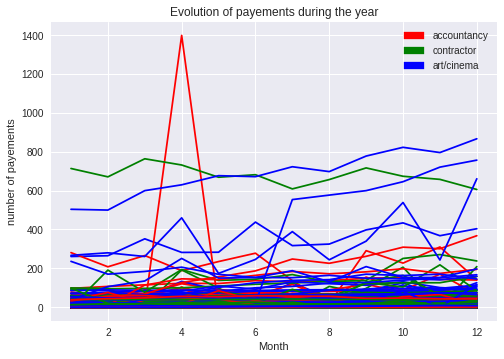

In [10]:
import matplotlib.patches as mpatches
vert_color = {'art/cinema': 'blue', 'contractor': 'green', 'accountancy': 'red'}
for i in range(902):
    plt.plot(range(1, 13), df1.iloc[i, 1:13], color=vert_color[df1['company'][i]])
plt.xlabel('Month')
plt.ylabel('number of payements')
plt.title('Evolution of payements during the year')
patch = [mpatches.Patch(color=v, label=k) for k, v in vert_color.items()]
plt.legend(handles=patch)
plt.show()

In [11]:
df1[df1['apr_payments'] > 1200] # looking for the company_id that looks like an outlier

,company,jan_payments,feb_payments,mar_payments,apr_payments,may_payments,jun_payments,jul_payments,aug_payments,sep_payments,oct_payments,nov_payments,dec_payments
167,accountancy,0.0,0.0,0.0,1399.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


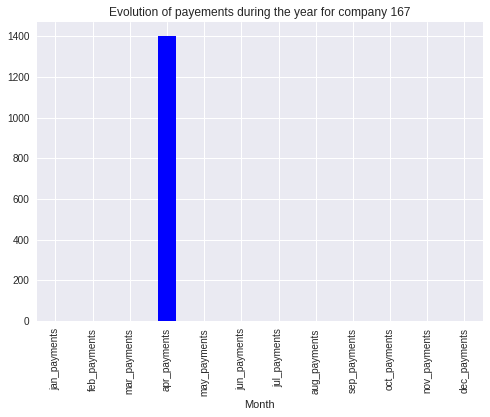

In [12]:
df.iloc[167, 1:13].plot(kind='bar' , color='blue')
plt.xlabel('Month')
plt.title('Evolution of payements during the year for company 167')
plt.show()

I consider company 167 to be an outlier as it only had payments in April. April is the end of the tax year and it could make sense for an accountancy company to only take payement during this month, and nothing during the rest of the year. Therefore, we can't predict that this company will churn in January. I would either need more information about the company or another year of payement's data to be able to predict if this company will churn or not.

In [13]:
df1 = df1.drop(167).reset_index(drop=True)

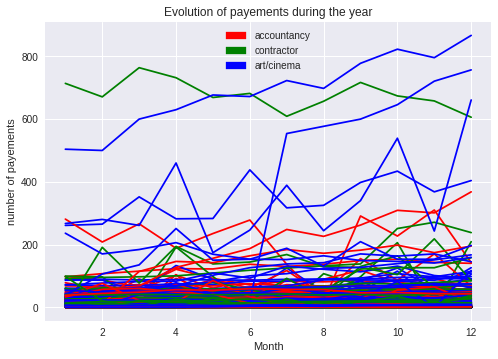

In [14]:
for i in range(901):
    plt.plot(range(1, 13), df1.iloc[i, 1:13], color=vert_color[df1['company'][i]])
plt.xlabel('Month')
plt.ylabel('number of payements')
plt.title('Evolution of payements during the year')
plt.legend(handles=patch)
plt.show()

----
###  Linear regression
---

I will do a prediction of the number of payements for December using the data from January to November, and will then compare it the the real number of payement in December to evaluate the accuracy of the model.

In [15]:
X, y = df1.iloc[:, 1:12], df1.iloc[:, 12]

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.94969091321234456

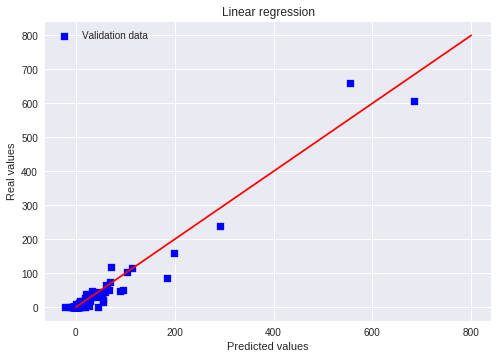

In [18]:
plt.scatter(y_pred, y_test, c = "blue", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 800], [0, 800], c = "red")
plt.show()

In [19]:
cv_results = cross_val_score(reg, X, y, cv = 3)
print(cv_results)

[ 0.95293967  0.97784941  0.972143  ]


In [20]:
np.mean(cv_results)

0.96764402619484702

---
As the model has a good coefficient R^2, I will now apply it to the months from February to December to predict the numbers of payements for next January.

In [21]:
X_next_jan = df1.iloc[:, 2:13]
y_next_jan = reg.predict(X_next_jan)

In [22]:
df1['jan_prediction'] = y_next_jan # I add the prediction to the dataframe.

---
I look for the company that didn't had any payement for the months of October, November, December and next January. I think that is a good indicator that they might churn.

In [23]:
churn_pay = df1[(df1['oct_payments'] <= 0) & (df1['nov_payments'] <= 0) & (df1['dec_payments'] <= 0) & (df1['jan_prediction'] <= 0)]

In [24]:
churn_pay.shape

(271, 14)

In [25]:
print(churn_pay['company']) # Companies that might churn at the beginning of next year

0       art/cinema
8       art/cinema
9       contractor
10      contractor
11      contractor
18      contractor
22     accountancy
23      contractor
26      contractor
31      art/cinema
32     accountancy
33      art/cinema
36      art/cinema
40      contractor
41      art/cinema
46      art/cinema
48      art/cinema
49     accountancy
50     accountancy
52     accountancy
53      art/cinema
55     accountancy
62      contractor
75      contractor
78     accountancy
79     accountancy
86     accountancy
90     accountancy
91     accountancy
94      contractor
          ...     
775     art/cinema
776     art/cinema
778     contractor
779    accountancy
781     art/cinema
786    accountancy
787     art/cinema
792    accountancy
795    accountancy
796     contractor
805    accountancy
813    accountancy
814    accountancy
815     contractor
818     contractor
820     contractor
824    accountancy
833     art/cinema
834     contractor
848    accountancy
856     art/cinema
863    accou

I now have a list of companies that are at risk of churning at the beginning of next year.

---
## 2. Incorporation of the mandates columns

If a company doesn't set any mandate during a couple of months, that would probably mean that it is about to churn. But if it is a new company and it set mandates at the end of the year and has no payement, that could mean it will set payement at the beginning of next year. Therfore I will add the mandates to my previous model.

First, I check if my decision of dropping company 167 still makes sense.

In [26]:
df.iloc[167]

company         accountancy
jan_payments              0
feb_payments              0
mar_payments              0
apr_payments           1399
may_payments              0
jun_payments              0
jul_payments              0
aug_payments              0
sep_payments              0
oct_payments              0
nov_payments              0
dec_payments              0
jan_mandates             25
feb_mandates              8
mar_mandates              0
apr_mandates              0
may_mandates              0
jun_mandates              0
jul_mandates              0
aug_mandates              0
sep_mandates              0
oct_mandates              0
nov_mandates              0
dec_mandates              0
Name: 167, dtype: object

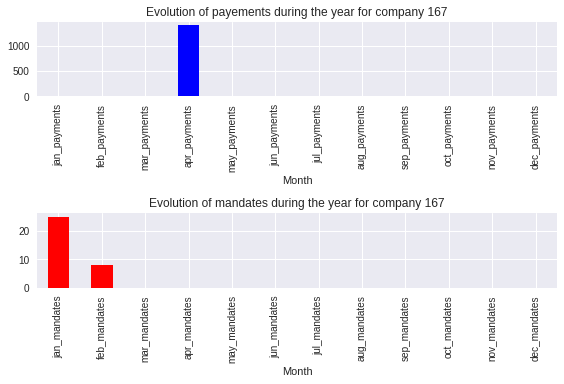

In [27]:
plt.subplot(2,1,1)
df.iloc[167, 1:13].plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.title('Evolution of payements during the year for company 167')

plt.subplot(2,1,2)
df.iloc[167, 13:25].plot(kind='bar', color='red')
plt.xlabel('Month')
plt.title('Evolution of mandates during the year for company 167')
plt.tight_layout()
plt.show()

This company is an accountancy company that only had payments in April and mandates just before that date. I will therefor continue to consider company 167 as an outlier.

In [28]:
churn_mand = df.iloc[churn_pay.index] # adding the mandates columns to the churn DataFrame

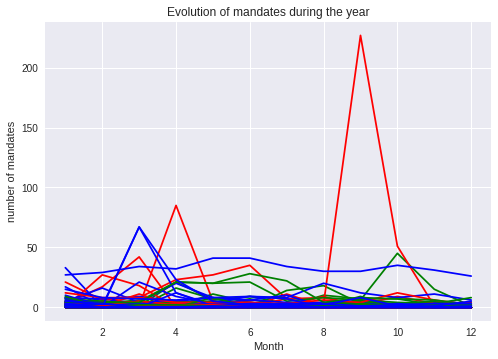

In [29]:
for i in range(236):
    plt.plot(range(1, 13), churn_mand.iloc[i, 13:25], color=vert_color[df1['company'][i]])
plt.xlabel('Month')
plt.ylabel('number of mandates')
plt.title('Evolution of mandates during the year')
plt.show()

In [30]:
churn = churn_mand[(churn_mand['oct_mandates'] == 0) 
                         & (churn_mand['nov_mandates'] == 0) & (churn_mand['dec_mandates'] == 0)]

In [31]:
churn.shape

(186, 25)

In [32]:
print(churn.iloc[:, 0:3]) # Companies that might churn at the beginning of 2015

         company  jan_payments  feb_payments
0     art/cinema           0.0           0.0
8     art/cinema           0.0           0.0
9     contractor           0.0           0.0
10    contractor           0.0           1.0
11    contractor           0.0           0.0
18    contractor           0.0           0.0
22   accountancy           0.0           3.0
23    contractor           0.0           0.0
31    art/cinema           0.0           1.0
36    art/cinema           0.0           0.0
40    contractor           0.0           0.0
41    art/cinema           0.0           0.0
48    art/cinema           0.0           0.0
49   accountancy           1.0           0.0
50   accountancy           0.0           0.0
52   accountancy           3.0           0.0
53    art/cinema           1.0           0.0
55   accountancy           0.0           0.0
62    contractor           4.0           4.0
75    contractor           0.0           0.0
78   accountancy           0.0           0.0
79   accou